In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis'

In [4]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [5]:
# Load the data 
file_path = "filtered_accident_data_set.csv"  # file path 
df = pd.read_csv(file_path) 

# Display basic structure 
print("Dataset Shape:", df.shape)  
print("First few rows:\n", df.head()) 

Dataset Shape: (32657, 13)
First few rows:
            Index Accident_Severity Accident Date   Latitude  \
0  200720D003001            Slight    02-01-2019  52.513668   
1  200720D003101            Slight    02-01-2019  52.502396   
2  200720D003802           Serious    03-01-2019  52.563201   
3  200720D005801            Slight    02-01-2019  52.493431   
4  200720D005901            Slight    05-01-2019  52.510805   

        Light_Conditions District Area  Longitude  Number_of_Casualties  \
0  Darkness - lights lit    Birmingham  -1.901975                     1   
1               Daylight    Birmingham  -1.867086                     1   
2               Daylight    Birmingham  -1.822793                     1   
3               Daylight    Birmingham  -1.818507                     1   
4  Darkness - lights lit    Birmingham  -1.834202                     1   

   Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
0                   2             Wet or damp    Dual car

## Road Conditions and Accident Severity

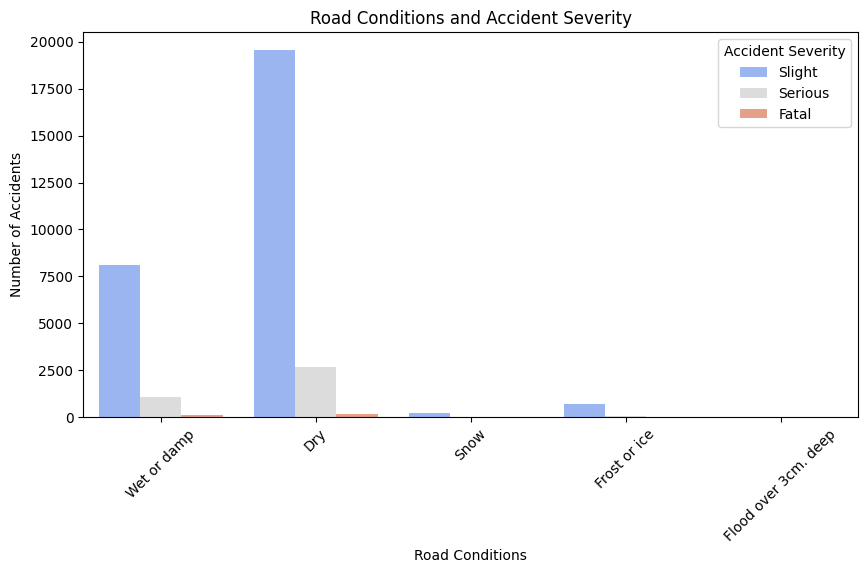

In [6]:
# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Road_Surface_Conditions", hue="Accident_Severity", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Road Conditions and Accident Severity")
plt.xlabel("Road Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()


Accident Severity Distribution

In [7]:
# Define accident severity counts 

accident_severity_counts = df["Accident_Severity"].value_counts().reset_index()
accident_severity_counts.columns = ["Accident_Severity", "Count"]

# Create a pie chart
fig = px.pie(accident_severity_counts, 
             names="Accident_Severity", 
             values="Count", 
             title="Accident Severity Distribution", 
             labels={"Accident_Severity": "Severity", "Count": "Number of Accidents"})

# Show the pie chart
fig.show()


 Light Conditions and Accidents

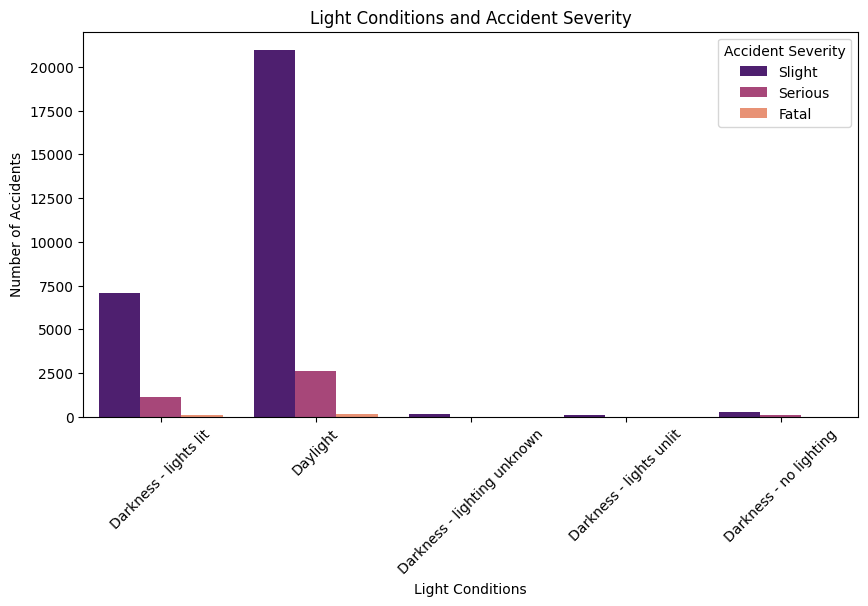

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Light_Conditions", hue="Accident_Severity", palette="magma")
plt.xticks(rotation=45)
plt.title("Light Conditions and Accident Severity")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()


Road Type and Number of Casualties

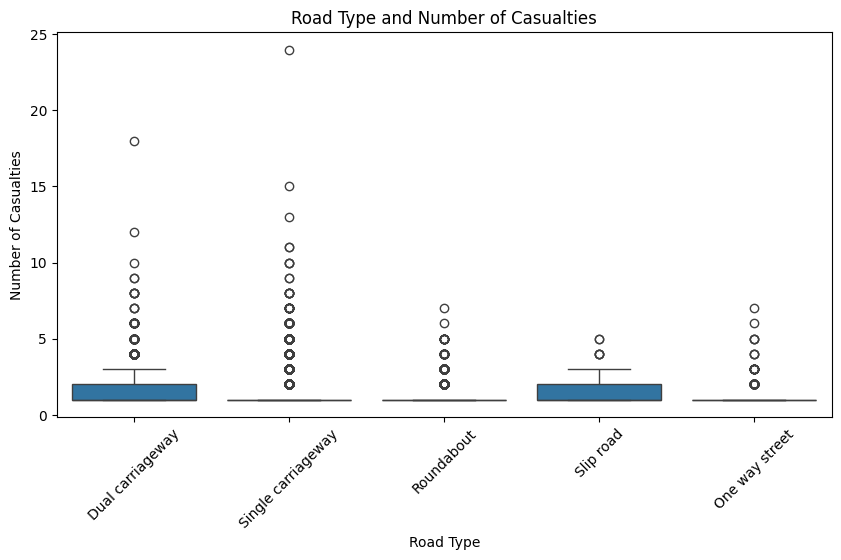

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Road_Type", y="Number_of_Casualties")
plt.xticks(rotation=45)
plt.title("Road Type and Number of Casualties")
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.show()


Accident Frequency in Urban and Rural Areas

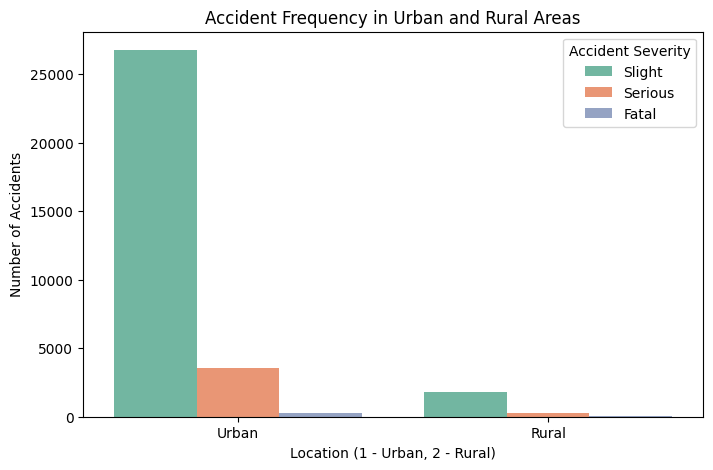

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Urban_or_Rural_Area", hue="Accident_Severity", palette="Set2")
plt.title("Accident Frequency in Urban and Rural Areas")
plt.xlabel("Location (1 - Urban, 2 - Rural)")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()


Number of Vehicles vs Number of Casualties

In [11]:
fig = px.scatter(df, 
                 x="Number_of_Vehicles", 
                 y="Number_of_Casualties", 
                 title="Number of Vehicles vs Number of Casualties")
fig.show()


Number of Casualties by Accident Severity

In [12]:
fig = px.box(df, 
             x="Accident_Severity", 
             y="Number_of_Casualties", 
             title="Number of Casualties by Accident Severity")
fig.show()


Impact of Light Conditions on Accidents
* Accidents might be more frequent in low-light conditions.

/var/folders/kl/hs44b81s0xj4q9bdfyngwwbm0000gn/T/ipykernel_34129/2041723189.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




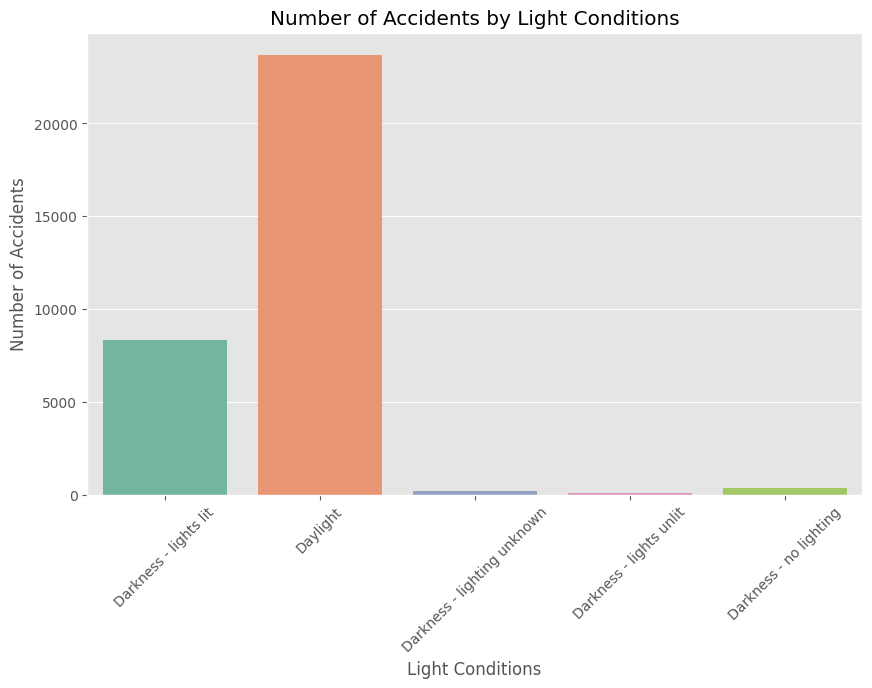

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Create a count plot for Light Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Light_Conditions", palette="Set2")

# Add labels and title
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Light Conditions")
plt.xticks(rotation=45)

# Show plot
plt.show()



## Univariate Histograms

| **Plot Position**      | **Title**                                                                                                   | **Description**                                                                                                            |
|------------------------|-------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| **Top Left Plot**      | **Original Distribution of "Number of Vehicles"**                                                           | Displays the frequency of accidents based on the number of vehicles involved.                                              |
|                        | KDE (Kernel Density Estimate)                                                                                | A smooth curved line representing the distribution's shape.                                                                |
| **Top Right Plot**     | **Original Distribution of "Number of Casualties"**                                                          | Shows how casualty numbers are distributed across accidents.                                                               |
| **Bottom Left Plot**   | **Log-Transformed Distribution of "Number of Vehicles"**                                                      | Applies log transformation (np.log1p()) to reduce skewness.                                                                |
|                        | Log Transformation                                                                                           | Compresses large values and expands small ones to clarify patterns, making the distribution more normal-like.                |
| **Bottom Right Plot**  | **Log-Transformed Distribution of "Number of Casualties"**                                                   | Same log transformation applied to casualty counts.                                                                        |


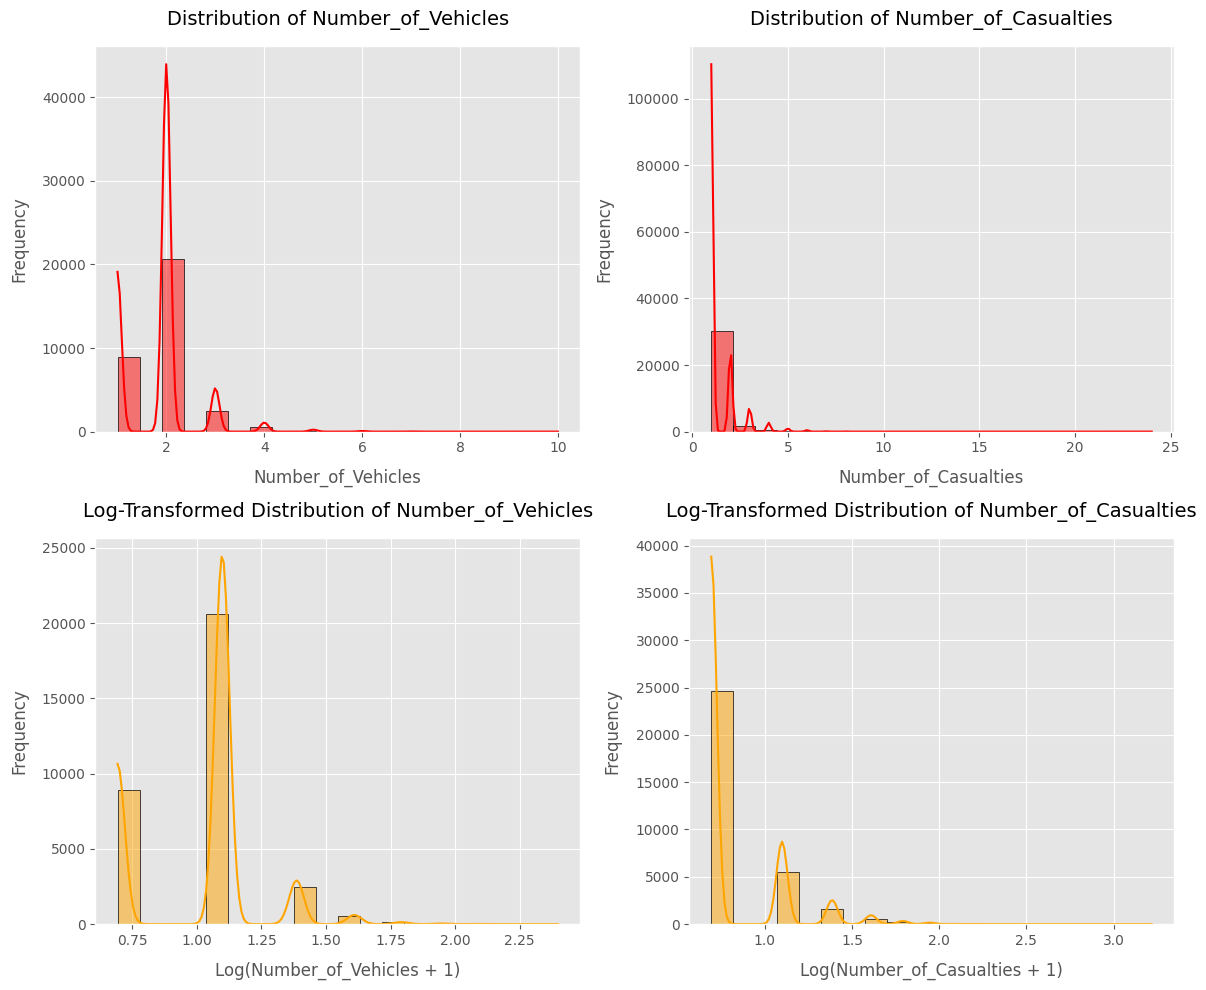

In [24]:
# Numeric columns to plot
numeric_cols = ["Number_of_Vehicles", "Number_of_Casualties"]

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Plot original and log-transformed histograms with KDE
for i, col in enumerate(numeric_cols):
    # Original histogram and KDE
    sns.histplot(
        df[col],
        bins=20,
        kde=True,
        ax=axes[0, i],
        color='red',
        edgecolor='black'
    )
   
    axes[0, i].set_title(f"Distribution of {col}", fontsize=14, pad=15)  # Title padding
    axes[0, i].set_xlabel(f"{col}", labelpad=10, fontsize=12)  # Label padding
    axes[0, i].set_ylabel("Frequency", labelpad=10, fontsize=12)

    # Log-transformed histogram and KDE
    sns.histplot(
        np.log1p(df[col]),
        bins=20,
        kde=True,
        ax=axes[1, i],
        color='orange',
        edgecolor='black'
    )
 
    axes[1, i].set_title(f"Log-Transformed Distribution of {col}", fontsize=14, pad=15)
    axes[1, i].set_xlabel(f"Log({col} + 1)", labelpad=10, fontsize=12)
    axes[1, i].set_ylabel("Frequency", labelpad=10, fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

| **Distribution**                         | **Observations** |
|------------------------------------------|-----------------|
| **Original Distribution of "Number_of_Vehicles"** | - Most accidents involve **2 vehicles**, followed by **1 vehicle** and **4 vehicles**, with a long tail up to **10 vehicles**.  |
| **KDE Insight**  | - Strong peak at **2 vehicles**, confirming their dominance.<br> - Smaller peak at **1 vehicle**, indicating frequent single-vehicle accidents.<br> - Long tail suggests rare multi-vehicle accidents (5–10 vehicles). |
| **Original Distribution of "Number_of_Casualties"** | - Most accidents result in **1 casualty**, with a long tail up to **24 casualties**. |
| **KDE Insight**  | - Sharp peak at **1 casualty**, showing single-casualty accidents are most common.<br> - Long tail suggests rare but severe accidents with high casualties. |
| **Log-Transformed Distribution of "Number_of_Vehicles"** | - Log transformation highlights **1–2 vehicle accidents** as the most frequent. |
| **Log-Transformed Distribution of "Number_of_Casualties"** | - Despite log transformation, the **right skew persists**, indicating frequent **1–2 casualty accidents**.<br> - Significant number of higher-casualty accidents, likely influenced by accident severity, vehicle type, or external factors. |
